<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/13_2_Ridge%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 및 데이터 불러오기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/G_ML_2/data/wine.csv",sep=',')

In [ ]:
X=data[data.columns[0:11]]

In [ ]:
y=data[['quality']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.7, random_state=42)

# 2. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]}

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
grid_search=GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0,
                                   10.0]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'alpha': 1.0}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.336


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.347


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.011928      0.009858  ...          0.363672         0.018079
1       0.006895      0.001278  ...          0.363575         0.018107
2       0.005964      0.000349  ...          0.363465         0.018140
3       0.006554      0.001103  ...          0.363411         0.018144
4       0.006308      0.000754  ...          0.362906         0.018126
5       0.005846      0.000092  ...          0.362044         0.018104
6       0.006157      0.000323  ...          0.356148         0.018026
7       0.006773      0.001362  ...          0.350276         0.017850

[8 rows x 21 columns]

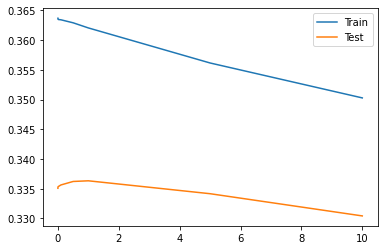

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_alpha'],  result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_alpha'],  result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'alpha': randint(low=0.0001, high=100)}

In [ ]:
random_search=RandomizedSearchCV(Ridge(), param_distributions=param_distribs, cv=5,  n_iter=1000, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=1000,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f30351a9a10>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'alpha': 1}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.336


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.347


In [ ]:
result_random= pd.DataFrame(random_search.cv_results_ )

In [ ]:
result_random

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0         0.009559      0.006340  ...          0.339964         0.017358
1         0.006475      0.000519  ...          0.328298         0.016685
2         0.006469      0.000419  ...          0.353677         0.017966
3         0.006334      0.000524  ...          0.323987         0.016428
4         0.006003      0.000268  ...          0.333291         0.016979
..             ...           ...  ...               ...              ...
995       0.005929      0.000430  ...          0.306307         0.015421
996       0.006334      0.000852  ...          0.336839         0.017184
997       0.006470      0.001485  ...          0.307662         0.015494
998       0.005706      0.000089  ...          0.315357         0.015922
999       0.007865      0.003265  ...          0.325009         0.016489

[1000 rows x 21 columns]

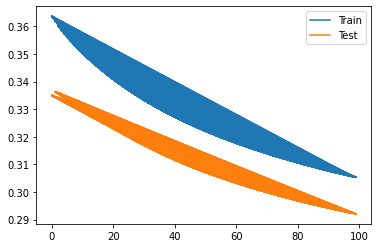

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_alpha'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_alpha'], result_random['mean_test_score'], label="Test")
plt.legend()